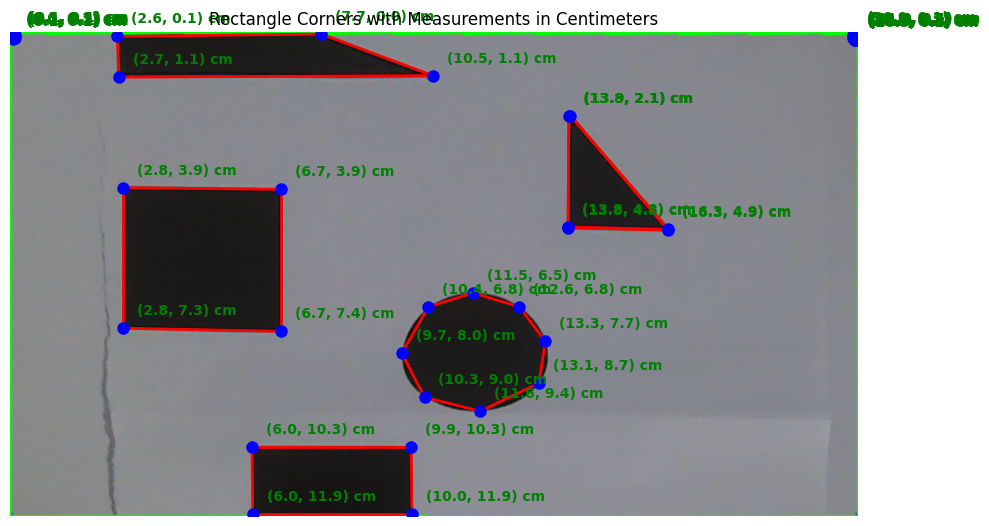


Corner coordinates in centimeters:
Shape 1: [(np.float64(5.988888888888889), np.float64(10.286111111111111)), (np.float64(6.008333333333334), np.float64(11.938888888888888)), (np.float64(9.955555555555556), np.float64(11.938888888888888)), (np.float64(9.936111111111112), np.float64(10.286111111111111))]
Shape 2: [(np.float64(10.363888888888889), np.float64(6.805555555555555)), (np.float64(9.702777777777778), np.float64(7.9527777777777775)), (np.float64(10.266666666666667), np.float64(9.041666666666666)), (np.float64(11.647222222222222), np.float64(9.391666666666667)), (np.float64(13.105555555555556), np.float64(8.691666666666666)), (np.float64(13.261111111111111), np.float64(7.661111111111111)), (np.float64(12.619444444444445), np.float64(6.805555555555555)), (np.float64(11.472222222222223), np.float64(6.455555555555556))]
Shape 3: [(np.float64(2.8), np.float64(3.85)), (np.float64(2.8), np.float64(7.330555555555556)), (np.float64(6.708333333333333), np.float64(7.408333333333333)), (np

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_plot_rectangle_cm(image_path, scale_factor=21/1080):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    coordinates_cm = []
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        points_cm = [(point[0][0] * scale_factor, point[0][1] * scale_factor) for point in approx]
        coordinates_cm.append(points_cm)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    
    for points in coordinates_cm:
        points = np.array(points)
        for i in range(len(points)):
            next_i = (i + 1) % len(points)
            plt.plot([points[i][0]/scale_factor, points[next_i][0]/scale_factor], 
                    [points[i][1]/scale_factor, points[next_i][1]/scale_factor], 'r-', linewidth=2)
        
        for i, (x_cm, y_cm) in enumerate(points):
            plt.plot(x_cm/scale_factor, y_cm/scale_factor, 'bo', markersize=8)
            plt.annotate(f'({x_cm:.1f}, {y_cm:.1f}) cm', 
                        (x_cm/scale_factor, y_cm/scale_factor),
                        xytext=(10, 10), textcoords='offset points',
                        color='green', fontweight='bold')
    
    plt.title('Rectangle Corners with Measurements in Centimeters')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return coordinates_cm

# Usage
img_path = 'map_view.png'
coords_cm = detect_and_plot_rectangle_cm(img_path)
print("\nCorner coordinates in centimeters:")
for i, shape in enumerate(coords_cm):
    print(f"Shape {i+1}:", shape)